<a href="https://colab.research.google.com/github/hooroobaby/NCUECTech/blob/main/ECT_HW5_107403037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means
## 1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('ageinc.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  1000 non-null   int64
 1   age     1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [ ]:
cols = df.columns
# 標準化的概念
for col in cols:
    df['z_'+col] = (df[col]-df[col].mean())/df[col].std()
df.head()

,income,age,z_income,z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064


## 2-1

In [ ]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=2, random_state=10) #分成兩群
X = df[['z_income', 'z_age']].values
model.fit_predict(X)
cluster_assignment = model.labels_
centers = model.cluster_centers_

In [ ]:
import numpy as np
# 做出SSE，內部從X0開始
print(np.sum((X - centers[cluster_assignment])**2))

1189.7476232504307


## 2-2

In [ ]:
import matplotlib.pyplot as plt
ss = []
krange = list(range(2, 11))
X = df[['z_income', 'z_age']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    ss.append(np.sum((X-centers[cluster_assignments])**2))
ss

[1189.7476232504307,
 734.6649696823624,
 386.0702389582008,
 341.65511788057347,
 301.60354116992715,
 271.16618461596397,
 241.90179918136994,
 216.130205395693,
 192.56868717475385]

## 2-3

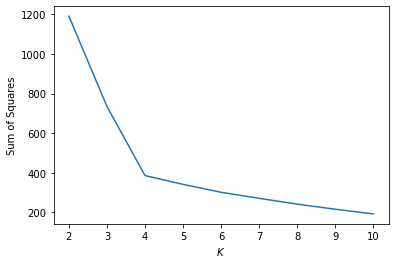

In [ ]:
plt.plot(krange, ss)
plt.xlabel('$K$')
plt.ylabel('Sum of Squares')
plt.show()

In [ ]:
from sklearn import metrics
silhouettes = []
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    silhouettes.append(metrics.silhouette_score(X,cluster_assignments))
silhouettes

# 因此可得知k=4是最好的，(silhouettes越接近1越好)

[0.3959184508340371,
 0.4208222007732521,
 0.5070220697246968,
 0.4563497743918506,
 0.39517629742960697,
 0.3462633058866619,
 0.3544817379201776,
 0.3288853395094744,
 0.3400215840902519]

## 3.

In [ ]:
model = cluster.KMeans(n_clusters=4, random_state=10) #分成4群
X = df[['z_income', 'z_age']].values
model.fit_predict(X)
cluster_assignment = model.labels_

In [ ]:
df["kmean_cluster"] = cluster_assignment

In [ ]:
df

,income,age,z_income,z_age,kmean_cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,1
2,36517,52,-1.110474,1.146963,2
3,33223,49,-1.194372,0.873660,2
4,72994,53,-0.181416,1.238064,2
...,...,...,...,...,...
995,70615,29,-0.242008,-0.948363,1
996,95102,41,0.381668,0.144851,0
997,42203,35,-0.965654,-0.401756,1
998,16975,31,-1.608203,-0.766161,1


In [ ]:
df.groupby(['kmean_cluster']).size()
# 分成四群

kmean_cluster
0    238
1    248
2    256
3    258
dtype: int64

# mean-shift
## 4

In [ ]:
shift = pd.read_csv('ageinc.csv')
cols = shift.columns
# 標準化的概念
for col in cols:
    shift['z_'+col] = (shift[col]-shift[col].mean())/shift[col].std()
shift.head()

,income,age,z_income,z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064


## 5.
#### MeanShift:發現樣本的平滑密度中的點 ;
#### estimate_bandwidth:計算要用於maen-shift演算法的頻寬

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# from sklearn.datasets.samples_generator import make_blobs #產生用於clustering的等向高斯分布點

In [ ]:
X = shift[['z_income','z_age']]
bandwidth = estimate_bandwidth(X, quantile=0.1)
bandwidth

0.636820406937075

## 6.

In [ ]:
#Mean Shift method
model = MeanShift(bandwidth = bandwidth)
model.fit(X)
labels = model.fit_predict(X)
cluster_assignment = model.labels_

In [ ]:
shift["meanShift_cluster"] = cluster_assignment
shift

,income,age,z_income,z_age,meanShift_cluster
0,101743,58,0.550812,1.693570,2
1,49597,27,-0.777331,-1.130565,3
2,36517,52,-1.110474,1.146963,0
3,33223,49,-1.194372,0.873660,0
4,72994,53,-0.181416,1.238064,0
...,...,...,...,...,...
995,70615,29,-0.242008,-0.948363,3
996,95102,41,0.381668,0.144851,2
997,42203,35,-0.965654,-0.401756,3
998,16975,31,-1.608203,-0.766161,3


In [ ]:
shift.groupby(['meanShift_cluster']).size()
# 分成四群

meanShift_cluster
0    255
1    259
2    239
3    247
dtype: int64

## 7.

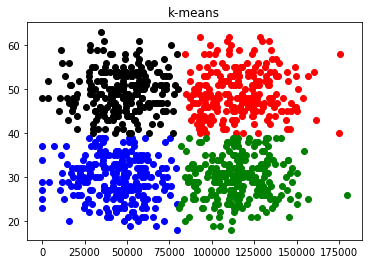

In [ ]:
import copy
df0 = copy.deepcopy(df[df['kmean_cluster'].isin(['0'])])
plt.scatter(df0['income'], df0['age'], c='red')
df1 = copy.deepcopy(df[df['kmean_cluster'].isin(['1'])])
plt.scatter(df1['income'], df1['age'], c='blue')
df2 = copy.deepcopy(df[df['kmean_cluster'].isin(['2'])])
plt.scatter(df2['income'], df2['age'], c='black')
df3 = copy.deepcopy(df[df['kmean_cluster'].isin(['3'])])
plt.scatter(df3['income'], df3['age'], c='green')
plt.title("k-means")
plt.show()

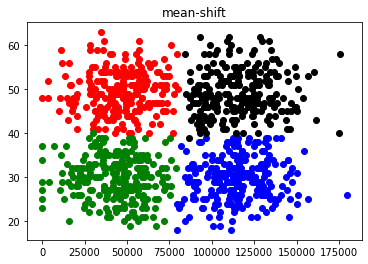

In [ ]:
shift0 = copy.deepcopy(shift[shift['meanShift_cluster'].isin(['0'])])
plt.scatter(shift0['income'], shift0['age'], c='red')
shift1 = copy.deepcopy(shift[shift['meanShift_cluster'].isin(['1'])])
plt.scatter(shift1['income'], shift1['age'], c='blue')
shift2 = copy.deepcopy(shift[shift['meanShift_cluster'].isin(['2'])])
plt.scatter(shift2['income'], shift2['age'], c='black')
shift3 = copy.deepcopy(shift[shift['meanShift_cluster'].isin(['3'])])
plt.scatter(shift3['income'], shift3['age'], c='green')
plt.title("mean-shift")
plt.show()

# k-prototypes
## 8.

In [ ]:
proto = pd.read_csv('age_education.csv')
proto['z_age'] = (proto['age']-proto['age'].mean())/proto['age'].std()
proto.head()

,age,education,z_age
0,27.007219,college,-1.446258
1,47.615409,highschool,0.438698
2,51.382815,highschool,0.783290
3,54.906622,highschool,1.105599
4,27.719939,less_than_highschool,-1.381068


## 9.

In [ ]:
conda info --envs

# conda environments:
#
base                  *  C:\Users\user\anaconda3
NLP_course               C:\Users\user\anaconda3\envs\NLP_course


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in c:\users\user\anaconda3\lib\site-packages (0.11.0)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
proto[:0] = proto[:0].astype(float)
proto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1000 non-null   float64
 1   education  1000 non-null   object 
 2   z_age      1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [ ]:
proto.groupby(['education']).size()

education
college                 334
highschool              333
less_than_highschool    333
dtype: int64

In [ ]:
# 將object物件轉換為nominal
repla = {'education': {'college':0, "highschool":1, "less_than_highschool":2}}
proto = proto.replace(repla)
proto.head()

,age,education,z_age
0,27.007219,0,-1.446258
1,47.615409,1,0.438698
2,51.382815,1,0.783290
3,54.906622,1,1.105599
4,27.719939,2,-1.381068


In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
dfMatrix = proto.to_numpy()
# catColumnsPos
test=KPrototypes(n_clusters=3, random_state=10)
cluster=test.fit_predict(dfMatrix, categorical=[1,2])
#Prints the count of each cluster group
pd.Series(cluster).value_counts()

2    397
1    315
0    288
dtype: int64

# k-modes
## 10.

In [ ]:
mode = pd.read_csv('customer_offers.csv', index_col="customer_name")
mode.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## 11.

In [ ]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=4, random_state=10)

clusters = km.fit_predict(mode)

pd.Series(clusters).value_counts()
# print(km.cluster_centroids_) # Print the cluster centroids

0    89
2     6
3     3
1     2
dtype: int64

## 12. 請用文字說明 k-means、mean-shift、k-prototypes、k-modes 四種分群方法的差異